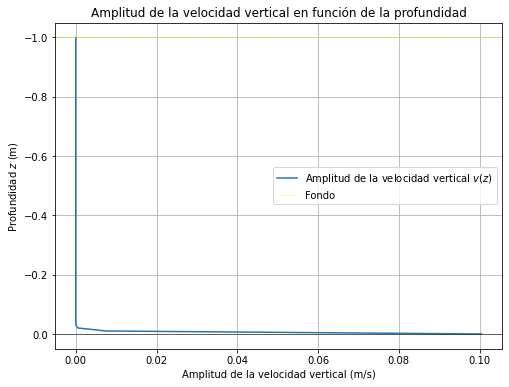

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constantes
omega = 16 * np.pi  # Frecuencia angular en rad/s
g = 9.81  # Aceleración de la gravedad en m/s^2
H = 1  # Profundidad en metros
v_max = 0.1005  # Velocidad máxima en la superficie en m/s

# Función de la relación de dispersión (gravedad)
def dispersion_relation(k):
    return omega**2 - g * k * np.tanh(k * H)

# Resolver para k (número de onda)
k_initial_guess = 1  # Suposición inicial
k_solution = fsolve(dispersion_relation, k_initial_guess)[0]

# Crear el eje z (profundidad) desde la superficie (z=0) hasta el fondo (z=-H)
z = np.linspace(0, -H, 100)

# Amplitud de la velocidad en función de la profundidad z
v_amplitude = v_max * np.exp(k_solution * z)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(v_amplitude, z, label='Amplitud de la velocidad vertical $v(z)$')
plt.xlabel('Amplitud de la velocidad vertical (m/s)')
plt.ylabel('Profundidad $z$ (m)')
plt.title('Amplitud de la velocidad vertical en función de la profundidad')
plt.axhline(0, color='black', linewidth=0.5)  # Línea en la superficie libre
plt.axhline(-H, color='yellow', linestyle='--', linewidth=0.5, label='Fondo')
plt.legend()
plt.gca().invert_yaxis()  # Invertir el eje y para que la superficie esté arriba
plt.grid(True)
plt.show()


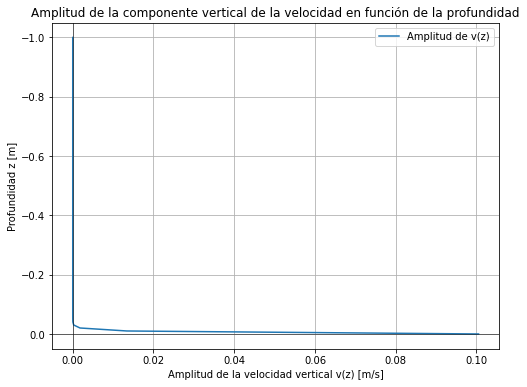

257.55542575727577


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Constantes conocidas
g = 9.81  # aceleración gravitacional en m/s^2
sigma = 0.072  # coeficiente de tensión superficial para el agua en N/m
rho = 1000  # densidad del agua en kg/m^3
H = 1  # profundidad en metros
f = 8  # frecuencia en Hz
omega = 2 * np.pi * f  # frecuencia angular en rad/s

# Ecuación de dispersión: ω^2 = (gk + σk^3/ρ) tanh(kH)
def dispersion_relation(k):
    return omega**2 - (g * k + (sigma * k**3) / rho) * np.tanh(k * H)

# Solución para el número de onda k
k_initial_guess = 1.0  # estimación inicial
k_solution = fsolve(dispersion_relation, k_initial_guess)[0]

# Amplitud máxima de la velocidad vertical
eta_0 = 2e-3  # amplitud de la onda en metros
v_max = eta_0 * omega  # amplitud en la superficie

# Coordenadas verticales (desde la superficie z=0 hasta el fondo z=-H)
z = np.linspace(0, -H, 100)

# Amplitud de la velocidad vertical en función de la profundidad
v_z = v_max * np.exp(k_solution * z)

# Graficar la amplitud de la velocidad vertical
plt.figure(figsize=(8, 6))
plt.plot(v_z, z, label="Amplitud de v(z)")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel("Amplitud de la velocidad vertical v(z) [m/s]")
plt.ylabel("Profundidad z [m]")
plt.title("Amplitud de la componente vertical de la velocidad en función de la profundidad")
plt.gca().invert_yaxis()  # Invertir el eje y para que z=0 esté arriba
plt.grid(True)
plt.legend()
plt.show()

# Imprimir el valor de k para referencia
k_solution
print (k)


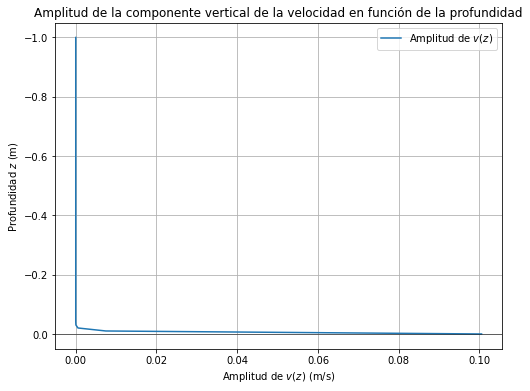

257.55542575727577


0.10053096491487339

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Datos
f = 8  # frecuencia en Hz
eta_0 = 2e-3  # amplitud de la onda en la superficie en metros
H = 1  # profundidad del fluido en metros
g = 9.81  # aceleración debida a la gravedad en m/s^2
omega = 2 * np.pi * f  # frecuencia angular

# Relación de dispersión para ondas de superficie: omega^2 = g * k * tanh(kH)
def dispersion_relation(k):
    return omega**2 - g * k * np.tanh(k * H)

# Resolver para el número de onda k
k_initial_guess = omega**2 / g  # aproximación inicial
k = fsolve(dispersion_relation, k_initial_guess)[0]

# Amplitud de la componente vertical de la velocidad en la superficie
v_surface = omega * eta_0 * np.cosh(k * H) / np.sinh(k * H)

# Coordenada vertical z desde la superficie (z=0) hasta el fondo (z=-H)
z = np.linspace(0, -H, 100)

# Amplitud de la componente vertical de la velocidad en función de z
v_amplitude = omega * eta_0 * np.cosh(k * (H + z)) / np.sinh(k * H)

# Graficar la amplitud de la velocidad vertical
plt.figure(figsize=(8, 6))
plt.plot(v_amplitude, z, label='Amplitud de $v(z)$')
plt.axhline(0, color='black',linewidth=0.5)
plt.title('Amplitud de la componente vertical de la velocidad en función de la profundidad')
plt.xlabel('Amplitud de $v(z)$ (m/s)')
plt.ylabel('Profundidad $z$ (m)')
plt.gca().invert_yaxis()  # Invertir el eje z para que la superficie esté en la parte superior
plt.grid(True)
plt.legend()
plt.show()

print (k)

v_surface